# Import python libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


# Import the dataset

In [2]:
df = pd.read_csv(r"C:\Users\Minich\OneDrive\Desktop\Data Analysis\Classification\diabetes data.csv")

df.head()

,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


# Data Summary 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes        4303 non-null   i

## Checking for duplicates 

In [4]:
df.duplicated(keep=False).sum()

0

# Class imbalance 

In [6]:
diabetes = df['Diabetes'].value_counts().reset_index()

diabetes

,Diabetes,count
0,0,3000
1,1,1303


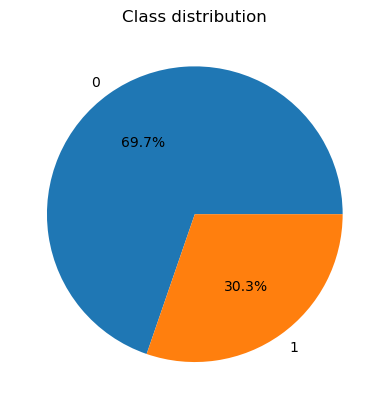

In [7]:
plt.pie(diabetes['count'], labels=diabetes['Diabetes'], autopct='%.1f%%')

plt.title('Class distribution')
plt.show()

# Algorithms 
- Random Forest
- XGBoost
- LightGBM 
- KNN  
- Adaboost 


In [8]:
# Import the classification algorithms
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [9]:
# Preprocessing modules 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
# Model evaluation metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve, auc

## Defining features and target variable 

In [13]:
# Defining the dependent variables/features
X = df.drop(columns={'Diabetes'})

# Traget variable 
y = df['Diabetes']

## Splitting 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 111)

# Scaling 

In [16]:
# Initialize the standard scaler 
scaler = StandardScaler()

# Fit the scaler to training data and transform 
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the testing data 
X_test_scaled = scaler.transform(X_test)

# KNeighborsClassifier

In [18]:
# Creating an instance of the KNN classifier 
knn_model = KNeighborsClassifier()

# Fit the model to training data 
knn_model.fit(X_train_scaled, y_train)

# Making predictions 
y_pred_knn = knn_model.predict(X_test_scaled)



## Model evaluation 

In [20]:
# Classification report 
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       732
           1       0.98      0.83      0.90       344

    accuracy                           0.94      1076
   macro avg       0.95      0.91      0.93      1076
weighted avg       0.94      0.94      0.94      1076



In [22]:
# Confusion matrix 
print(confusion_matrix (y_test, y_pred_knn))

[[725   7]
 [ 58 286]]


## PR and ROC Curves 

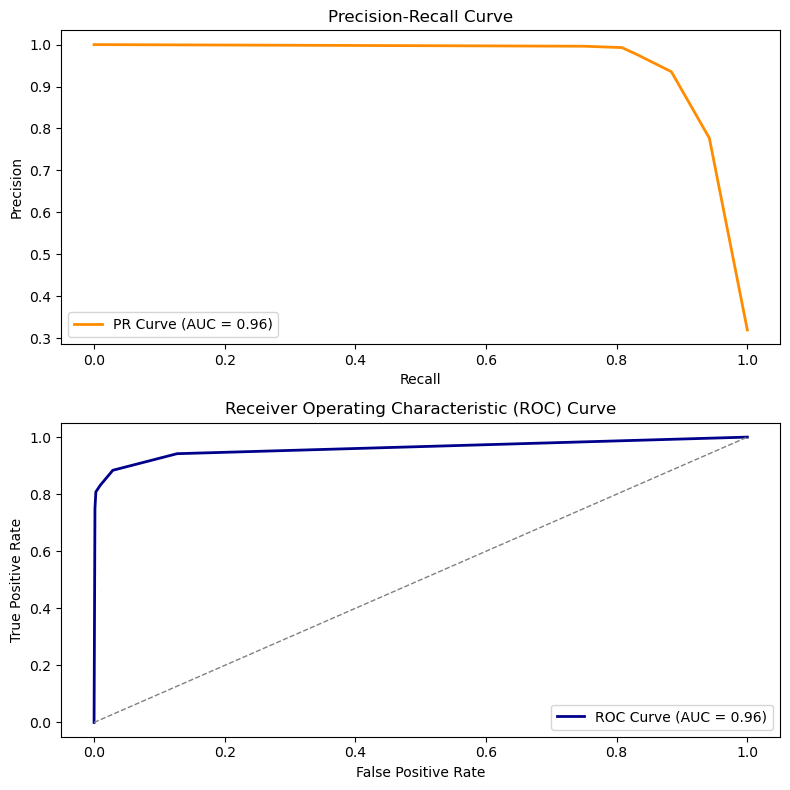

In [23]:
# Predict probabilities of the positive class 
y_probs_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Calculating the PR and ROC curves 
precision, recall, _ = precision_recall_curve(y_test,y_probs_knn)

# Roc curve 
fpr, tpr, _ = roc_curve(y_test,y_probs_knn)

# Calculate AUC for PR curve
pr_auc = auc(recall, precision)

# Calculate AUC for ROC curve
roc_auc = auc(fpr, tpr)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# Plot ROC curve
plt.subplot(2, 1, 2)
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [25]:
# Defining the clasiifiers 
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier() 
}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    # Fit the model to training data
    clf.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)

    # Print Classification Report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       732
           1       0.94      0.91      0.92       344

    accuracy                           0.95      1076
   macro avg       0.95      0.94      0.95      1076
weighted avg       0.95      0.95      0.95      1076

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       732
           1       0.93      0.92      0.93       344

    accuracy                           0.95      1076
   macro avg       0.95      0.94      0.95      1076
weighted avg       0.95      0.95      0.95      1076

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       732
           1       0.95      0.92      0.93       344

    accuracy                           0.96      1076
   ma

In [26]:
# Defining the clasiifiers 
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier() 
}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    # Fit the model to training data
    clf.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_scaled)

    # Print Confusion Matrix
    print(f"\n## Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))


## Confusion Matrix for Random Forest:
[[711  21]
 [ 31 313]]

## Confusion Matrix for AdaBoost:
[[710  22]
 [ 29 315]]

## Confusion Matrix for XGBoost Classifier:
[[716  16]
 [ 29 315]]
[LightGBM] [Info] Number of positive: 959, number of negative: 2268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2601
[LightGBM] [Info] Number of data points in the train set: 3227, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297180 -> initscore=-0.860763
[LightGBM] [Info] Start training from score -0.860763

## Confusion Matrix for LGBMClassifier:
[[715  17]
 [ 30 314]]


[LightGBM] [Info] Number of positive: 959, number of negative: 2268
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2601
[LightGBM] [Info] Number of data points in the train set: 3227, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.297180 -> initscore=-0.860763
[LightGBM] [Info] Start training from score -0.860763


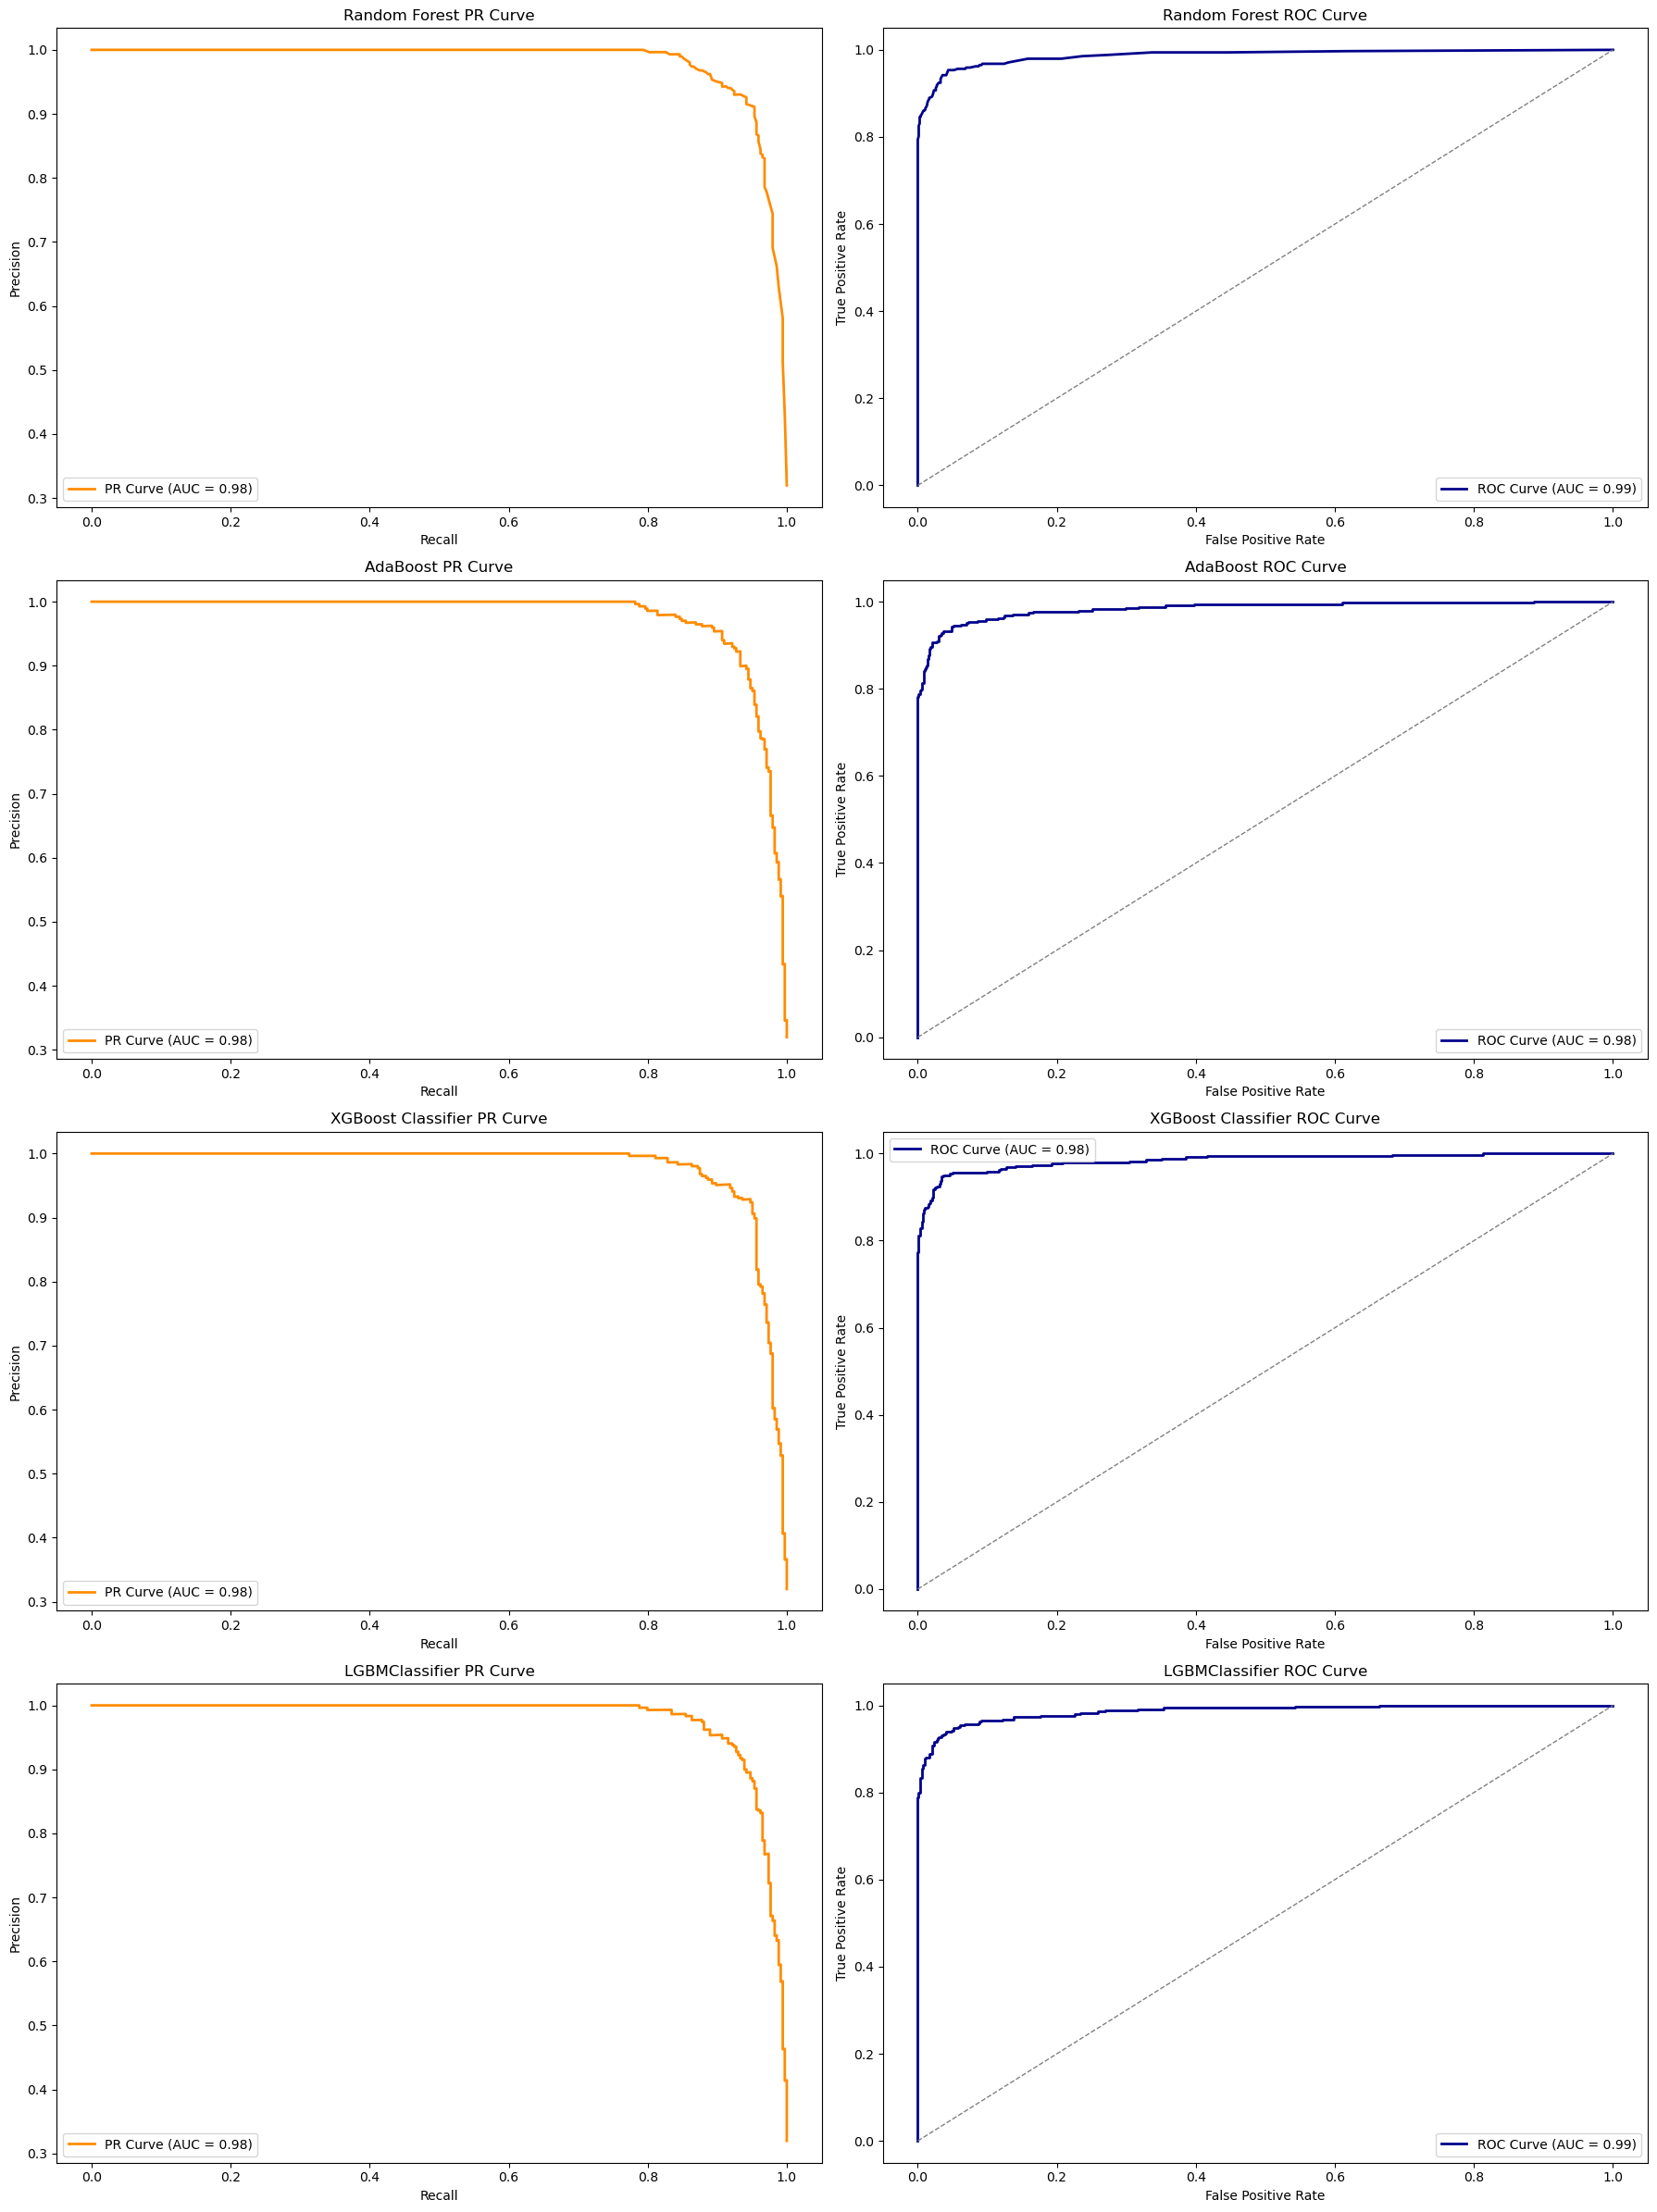

In [27]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost Classifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier() 
}


# Set up subplots
fig, axes = plt.subplots(len(classifiers), 2, figsize=(18, 6 * len(classifiers)))

# Iterate over classifiers
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the model to training data
    clf.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_probs = clf.predict_proba(X_test_scaled)[:, 1]

    # Plot Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)

    axes[i, 0].plot(recall, precision, color='darkorange', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
    axes[i, 0].set_title(f'{clf_name} PR Curve')
    axes[i, 0].set_xlabel('Recall')
    axes[i, 0].set_ylabel('Precision')
    axes[i, 0].legend(loc='best')

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    axes[i, 1].plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    axes[i, 1].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    axes[i, 1].set_xlabel('False Positive Rate')
    axes[i, 1].set_ylabel('True Positive Rate')
    axes[i, 1].set_title(f'{clf_name} ROC Curve')
    axes[i, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()